## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [9]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [10]:
!ls

drive  sample_data


In [11]:
# Import Libraries
import pandas as pd
import warnings
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [12]:
# loading data
data = pd.read_csv('/content/drive/MyDrive/project_02/kc_house_data.csv')
data.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19316,123039176,12/12/2014,399888.0,4,1.00,2370,30200,1.5,NO,NONE,...,7 Average,1570,800.0,1948,0.0,98146,47.5108,-122.366,1640,9719
20700,7853270830,8/5/2014,445000.0,3,2.50,2230,7934,2.0,NO,NONE,...,7 Average,2230,0.0,2005,0.0,98065,47.5439,-121.880,2310,4818
19194,1901600090,6/26/2014,359000.0,5,1.75,1940,6654,1.5,NO,NONE,...,7 Average,1940,0.0,1953,0.0,98166,47.4663,-122.359,2300,9500
2224,1449000270,8/6/2014,670000.0,4,2.75,3020,13530,1.0,NO,NONE,...,8 Good,1540,1480.0,1977,0.0,98052,47.6299,-122.099,2230,11896
20528,2771602428,10/29/2014,455000.0,3,2.50,1180,932,3.0,NaN,NONE,...,8 Good,1180,0.0,2010,0.0,98119,47.6380,-122.375,1180,2632
18218,9828702120,7/1/2014,581000.0,4,1.00,1630,2566,1.5,NO,NONE,...,7 Average,1630,0.0,1921,0.0,98122,47.6183,-122.300,1220,2314
2169,1320069271,6/12/2014,342500.0,3,2.00,2080,11375,1.0,NO,NONE,...,8 Good,2080,0.0,2002,0.0,98022,47.2140,-121.993,1080,12899
17861,2887703155,2/25/2015,642000.0,6,1.00,1530,4305,1.5,NO,NONE,...,7 Average,1530,0.0,1921,0.0,98115,47.6862,-122.310,1530,3800
15099,3897100170,8/27/2014,370000.0,3,1.75,1150,6600,1.5,NaN,NONE,...,6 Low Average,1150,0.0,1970,0.0,98033,47.6709,-122.185,1530,6600
16546,1431700280,4/9/2015,310000.0,5,2.00,2730,7344,1.0,NO,NONE,...,7 Average,1510,1220.0,1962,0.0,98058,47.4602,-122.171,1730,7700


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [14]:
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


##Exploratory Data Analysis 

### Univariate analysis

In [15]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [16]:
# data cleaning
def process_data(data):
  data['sqft_basement'] = data['sqft_basement'].str.replace(r'\W', '').replace('', np.nan).astype(float) # replacing special characters and converting dtype
  data['sqft_basement'].fillna(data['sqft_basement'].median(), inplace=True) #replaced null in sqft_basement with median
  data['waterfront'].fillna('NO', inplace=True)  # replaced null in waterfront with Unknown
  data['view'].fillna('NONE', inplace=True) # replace nulls in view with None
  data.drop(['date', 'id', 'zipcode', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True) #dropping unwanted columns
  data['yr_renovated'].fillna(data['yr_renovated'].median(), inplace=True) # replace null with median in year_renovated
  data['bedrooms'] = data['bedrooms'].replace(33, 3) #replaces 33 with 3 because clearly that's an outlier

  data['grade'] = data.grade.map(lambda x: int(x[0:2]) - 3) # strip grade and leave it in a scale of 0-10

  data['view'] = data['view'].replace({'NONE':0, 'FAIR':1, 'AVERAGE':2, 'GOOD':3, 'EXCELLENT':4}).astype(float)
  data['condition'] = data['condition'].replace({'Poor':1, 'Fair':2, 'Average':3, 'Good':4, 'Very Good':5})
  data['waterfront'] = data['waterfront'].replace({'NO':0, 'YES':1})


  return data

data = process_data(data)

>- Zipcode is not reliable of a location factor as latitude and longitude. e.g A home with a zipcode of 45067 is worth less than one with of 45068. Besides, latitude and longitude or more precise markers.
>- Dropped 'sqft_living15', 'sqft_lot15' because I already have sqft_living and sqft_lot
>- Null values in waterfront replaced with NO with the assumption that different individuals collected data and a fraction felt they will only fill in houses with a waterfront and leaving out the rest.
>- Replaced 33 bedroomed house with 3 rooms as it made no sense judging from its price and its a 1-floor house. This is clearly an input error
>- Replaced view with a scale of 0-4 where none=0, fair=1, average=2, good=3, excellent=4
>- Replaced condition with a scale of 1-5 with 1 being poor and 5 very good
>- Grade scale: 0:poor, 1:low, 2:fair, 3:low average, 4:average, 5:good, 6:better, 7:very good, 8:excellent, 9:luxury, 10:mansion

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
dtypes: float64(8), int64(8)
memory usage: 2.6 MB


In [18]:
data.sample(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long
8492,911100.0,4,3.25,3330,33826,2.0,0,0.0,5,5,3330,0.0,1924,0.0,47.7596,-122.275
17346,840000.0,4,1.75,2330,4000,2.0,0,0.0,5,5,1300,10300.0,1924,0.0,47.6660,-122.289
8375,288000.0,3,2.25,1560,9706,1.0,0,0.0,4,4,1560,0.0,1963,0.0,47.3191,-122.213
19845,328000.0,3,2.50,2242,4800,2.0,0,0.0,3,5,2242,0.0,2013,0.0,47.2581,-122.200
9302,235000.0,3,1.75,1380,8362,1.0,0,0.0,3,4,1380,0.0,1967,0.0,47.3121,-122.323



#Bivariate analysis
### Analyzing correlation of the numeric variables

## **Build a baseline simple linear regression model**

>- Identify the highest correlated predictor

In [19]:
# set target variable as price; check how the predictor variables correlate with price and identify the highest correlatd
data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
bathrooms        0.525906
view             0.393497
sqft_basement    0.321108
bedrooms         0.315954
lat              0.306692
waterfront       0.264306
floors           0.256804
yr_renovated     0.117855
sqft_lot         0.089876
yr_built         0.053953
condition        0.036056
long             0.022036
Name: price, dtype: float64

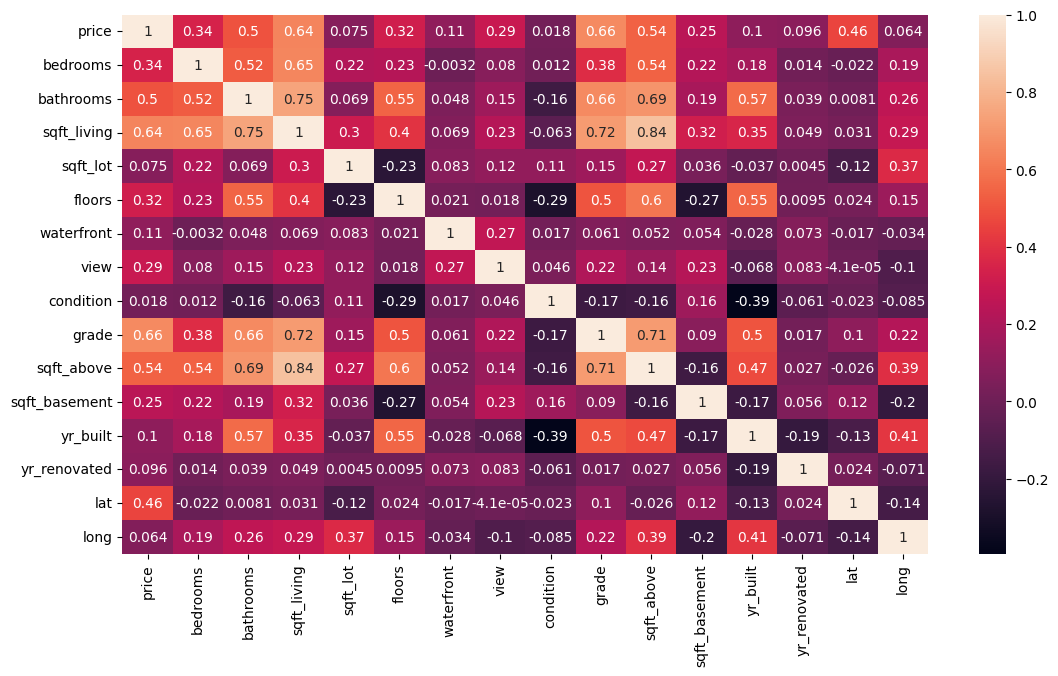

In [20]:
# Visualizing the correlation between predictors
plt.figure(figsize=(13,7))
sns.heatmap(data.corr(method='spearman', numeric_only=True), annot=True);

> highest correlated variable is sqft_living. <br> We'll plot a scatter plot with it vs price

## Plotting the Predictor(sqft_living) vs. Price

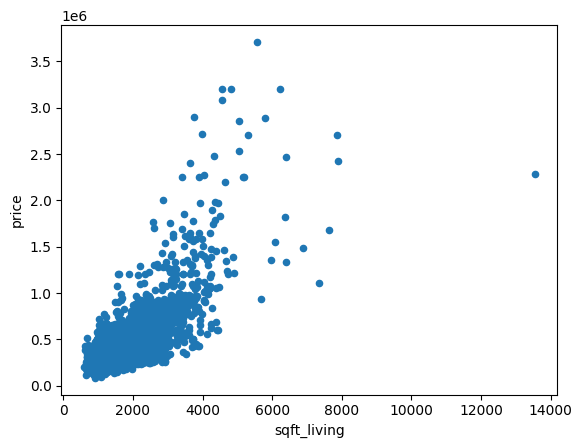

In [21]:
data.sample(2000, random_state=1).plot.scatter(x='sqft_living', y='price');

### Preparing data for modelling

In [22]:
#make a copy of tha data to be used
house = data.copy(deep=True)

In [23]:
# Regression variables to be used
y = house['price']  #target
X_baseline = house[['sqft_living']] #predictor

### Creating and fitting a simple linear regression

In [24]:
# Evaluating model
model = sm.OLS(y, sm.add_constant(X_baseline)).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        23:13:16   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

### Findings
Our model can explain about 50% price variance as a result of sft_living <br>
Our p value is way smaller that alpha level  of 0.05 hence we reject Null Hypothesis<br>


### Multiple Linear Regression

In [27]:
X = house.drop('price', axis=1)
y = house['price']

In [26]:
# statmodel
# use sm.add_constant(), to add constant term/y-intercept

X_pred = sm.add_constant(X)

#building the model
model =  sm.OLS(y, X_pred) .fit()

#getting the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     3278.
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        23:13:16   Log-Likelihood:            -2.9457e+05
No. Observations:               21597   AIC:                         5.892e+05
Df Residuals:                   21581   BIC:                         5.893e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -3.5e+07   1.56e+06    -22.375